## Example Text Features

In [58]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.datasets import fetch_20newsgroups

from sklearn.metrics import confusion_matrix


### Example using CountVectorizer

In [2]:

linha1 = "Texto é um conjunto de palavras e frases encadeadas que permitem interpretação e transmitem uma mensagem."
linha2 = "É qualquer obra escrita em versão original e que constitui um livro ou um documento escrito. "
linha3 = "Um texto é uma unidade linguística de extensão superior à frase."

texto = np.array([linha1, linha2, linha3]); print(texto)


['Texto é um conjunto de palavras e frases encadeadas que permitem interpretação e transmitem uma mensagem.'
 'É qualquer obra escrita em versão original e que constitui um livro ou um documento escrito. '
 'Um texto é uma unidade linguística de extensão superior à frase.']


In [3]:
#Usando countVectorizer para contar o número de vezes que a palavra ocorre em cada linha.

countV = CountVectorizer()
countWord = countV.fit_transform(texto) 

df_countWords = pd.DataFrame(countWord.toarray(), columns=countV.get_feature_names()) 
df_countWords

,conjunto,constitui,de,documento,em,encadeadas,escrita,escrito,extensão,frase,...,permitem,qualquer,que,superior,texto,transmitem,um,uma,unidade,versão
0,1,0,1,0,0,1,0,0,0,0,...,1,0,1,0,1,1,1,1,0,0
1,0,1,0,1,1,0,1,1,0,0,...,0,1,1,0,0,0,2,0,0,1
2,0,0,1,0,0,0,0,0,1,1,...,0,0,0,1,1,0,1,1,1,0


In [4]:

# Se o texto estiver todo na mesma linha, tem-se:

texto_2 = np.array([linha1 + linha2 + linha3]); print(texto_2)


['Texto é um conjunto de palavras e frases encadeadas que permitem interpretação e transmitem uma mensagem.É qualquer obra escrita em versão original e que constitui um livro ou um documento escrito. Um texto é uma unidade linguística de extensão superior à frase.']


In [5]:

countWord_2 = countV.fit_transform(texto_2)

df_2 = pd.DataFrame(countWord_2.toarray(), columns=countV.get_feature_names()); print(df_2.shape)

df_2

(1, 29)


,conjunto,constitui,de,documento,em,encadeadas,escrita,escrito,extensão,frase,...,permitem,qualquer,que,superior,texto,transmitem,um,uma,unidade,versão
0,1,1,2,1,1,1,1,1,1,1,...,1,1,2,1,2,1,4,2,1,1


### Example using TfidfVectorizer

In [7]:

texto = np.array([linha1 + linha2 + linha3]); texto


array(['Texto é um conjunto de palavras e frases encadeadas que permitem interpretação e transmitem uma mensagem.É qualquer obra escrita em versão original e que constitui um livro ou um documento escrito. Um texto é uma unidade linguística de extensão superior à frase.'],
      dtype='<U262')

In [12]:

extract_text = TfidfVectorizer()
freq_words = extract_text.fit_transform(texto)

df_freq_words = pd.DataFrame(freq_words.toarray(), columns=extract_text.get_feature_names())

df_freq_words

,conjunto,constitui,de,documento,em,encadeadas,escrita,escrito,extensão,frase,...,permitem,qualquer,que,superior,texto,transmitem,um,uma,unidade,versão
0,0.133631,0.133631,0.267261,0.133631,0.133631,0.133631,0.133631,0.133631,0.133631,0.133631,...,0.133631,0.133631,0.267261,0.133631,0.267261,0.133631,0.534522,0.267261,0.133631,0.133631


### Applying Naive Bayes Muiltinomial

In [17]:

data = fetch_20newsgroups() # downloading data 


In [24]:

print("Quantidade tópicos: ", len(data.target_names)); print("Tópicos: ")
data.target_names # topicos

Quantidade tópicos:  20
Tópicos: 


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [32]:

data.filenames#.shape # file_names


array(['/home/garcia/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994',
       '/home/garcia/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51861',
       '/home/garcia/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51879',
       ...,
       '/home/garcia/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695',
       '/home/garcia/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319',
       '/home/garcia/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104440'],
      dtype='<U93')

In [28]:
data.target # real data (test, put as integers)

array([7, 4, 4, ..., 3, 1, 8])

In [47]:

print("Dados de treino: ",len(data.data))
print("Labels: ", data.target.shape)

Dados de treino:  11314
Labels:  (11314,)


In [40]:

select_topics = ["sci.space","sci.electronics","soc.religion.christian","talk.religion.misc","alt.atheism"]

data_selected_train = fetch_20newsgroups(subset="train",categories=select_topics)
data_selected_test = fetch_20newsgroups(subset="test", categories=select_topics)

In [42]:

print(data_selected_train.data[0]) # example text

From: livesey@solntze.wpd.sgi.com (Jon Livesey)
Subject: Re: Morality? (was Re: <Political Atheists?)
Organization: sgi
Lines: 47
Distribution: world
NNTP-Posting-Host: solntze.wpd.sgi.com

In article <1ql667INN54a@gap.caltech.edu>, keith@cco.caltech.edu (Keith Allan Schneider) writes:
|> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
|> 
|> >I don't expect the lion to know, or not know anything of the kind.
|> >In fact, I don't have any evidence that lions ever consider such 
|> >issues.
|> >And that, of course, is why I don't think you can assign moral
|> >significance to the instinctive behaviour of lions.
|> 
|> What I've been saying is that moral behavior is likely the null behavior.
|> That is, it doesn't take much work to be moral, but it certainly does to
|> be immoral (in some cases).

That's the craziest thing I ever heard.   Are you serious?

	"it doesn't take much work to be moral?"

|> Also, I've said that morality is a remnant of evolution.  

Really?   And that's why 

In [51]:

featureExtractText = TfidfVectorizer()
model_multinomialNB = MultinomialNB()

model = make_pipeline(featureExtractText, model_multinomialNB)

model.fit(data_selected_train.data,data_selected_train.target);

In [52]:

class_predicted = model.predict(data_selected_test.data)

In [54]:
# confusion matrix

conf_mat = confusion_matrix(data_selected_test.target, class_predicted); conf_mat

array([[195,   1,   5, 116,   2],
       [  2, 323,  16,  52,   0],
       [  0,   1, 369,  24,   0],
       [  2,   0,   5, 391,   0],
       [ 35,   0,   9, 161,  46]])

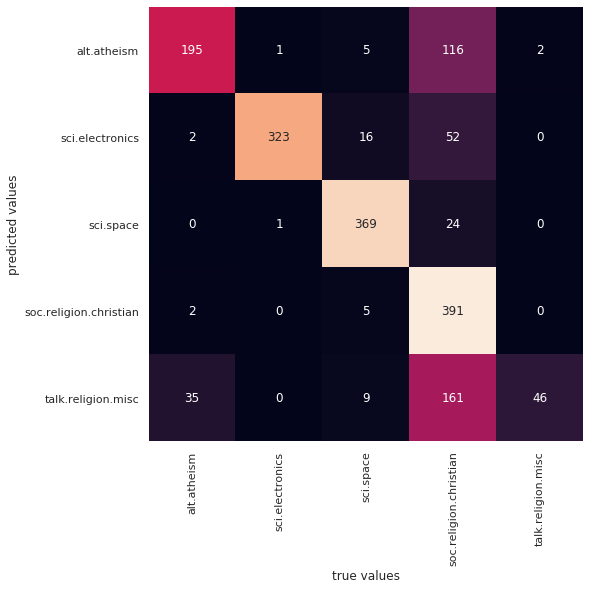

In [74]:

fig, axe = plt.subplots(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, square=True, cbar=False, fmt="d", xticklabels=data_selected_train.target_names, yticklabels=data_selected_train.target_names)
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.show()

In [81]:

#Example predict strings

def predict_strings(string, m=model, data=data_selected_train):
    p = m.predict([string]); #print(p); print(p[0]) ; # predict tanto espera uma listra como entrada como retorna também uma lista
    return data.target_names[p[0]]


predict_strings("space it is a really mean of ...")

'sci.space'

## References

[1]https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
<br>
[2]https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html
<br>
[3]https://scikit-learn.org/stable/datasets/index.html#real-world-datasets
<br>